In [3]:
# -*- coding: utf-8 -*-
import numpy as np

data_path = "./fluorescence_data.csv"

data = np.genfromtxt(data_path, delimiter=",", skip_header=1)

time = data[:, 0]
fluorescence = data[:, 1]

time,fluorescence


(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.]),
 array([  1.,   2.,   0.,   0.,   3.,   2.,   0.,   0.,   0.,   1.,   0.,
          2.,   6.,   7.,   7.,   9.,  13.,  22.,  10.,   9.,  19.,  28.,
         21.,  20.,  33.,  34.,  38.

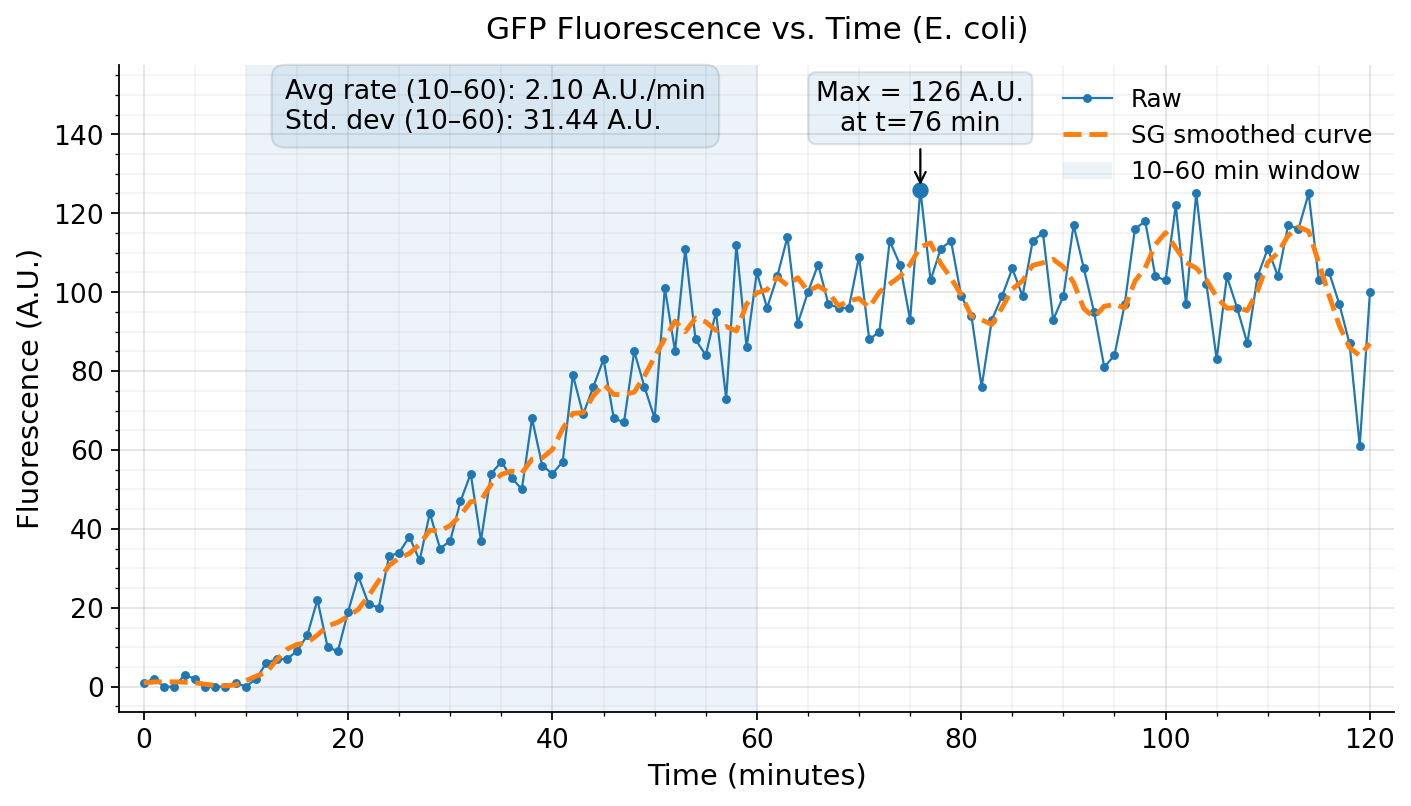

Max fluorescence: 126.00 A.U. at t=76.00 min
Average rate (10–60 min): 2.1000 A.U./min
Std. dev (10–60 min): 31.4448 A.U.


In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from scipy.signal import savgol_filter

def _valid_sg_window(n, desired=11, poly=3):
    w = int(desired)
    if w <= poly + 1:
        w = poly + 2
    if w % 2 == 0:
        w += 1
    if w > n:
        w = n if n % 2 == 1 else n - 1
        if w <= poly + 1:
            w = poly + 3 if (poly + 3) <= n else n
            if w % 2 == 0 and w < n:
                w += 1
    return max(w, poly + 2 + (1 - (poly + 2) % 2))

poly = 3
win  = _valid_sg_window(len(fluorescence), desired=11, poly=poly)
y_sg = savgol_filter(fluorescence, window_length=win, polyorder=poly, mode="interp")

def value_at(tq):
    idx = np.where(np.isclose(time, tq))[0]
    if len(idx):
        return float(fluorescence[idx[0]])
    return float(np.interp(tq, time, fluorescence))

f10 = value_at(10.0)
f60 = value_at(60.0)
avg_rate = (f60 - f10) / (60.0 - 10.0)
mask_10_60 = (time >= 10.0) & (time <= 60.0)
std_10_60 = float(np.std(fluorescence[mask_10_60], ddof=1))

imax = int(np.nanargmax(fluorescence))
tmax, fmax = float(time[imax]), float(fluorescence[imax])

plt.rcParams.update({
    "figure.figsize": (9, 5.2),
    "figure.dpi": 160,
    "savefig.dpi": 300,
    "font.size": 12,
    "axes.labelsize": 13,
    "axes.titlesize": 14,
    "legend.fontsize": 11,
})

fig, ax = plt.subplots()

ax.plot(time, fluorescence, marker="o", ms=3, lw=1, label="Raw")
ax.plot(time, y_sg, lw=2.2, linestyle="--", label=f"SG smoothed curve")

ax.axvspan(10, 60, alpha=0.08, label="10–60 min window")

ax.scatter([tmax], [fmax], s=40, zorder=3)

yl0, yl1 = ax.get_ylim()
target_top = max(yl1, fmax * 1.25)
ax.set_ylim(yl0, target_top)
ax.set_title("GFP Fluorescence vs. Time (E. coli)", pad=12)

if fmax / target_top > 0.86:
    ax.annotate(
        f"Max = {fmax:.0f} A.U.\nat t={tmax:.0f} min",
        xy=(tmax, fmax),
        xytext=(tmax, 1.02),
        textcoords=ax.get_xaxis_transform(), 
        ha="center", va="bottom",
        arrowprops=dict(arrowstyle="->", lw=1),
        bbox=dict(boxstyle="round,pad=.3", alpha=.10),
        clip_on=False,
    )
else:
    ax.annotate(
        f"Max = {fmax:.0f} A.U.\nat t={tmax:.0f} min",
        xy=(tmax, fmax),
        xytext=(0, 24),
        textcoords="offset points",
        ha="center", va="bottom",
        arrowprops=dict(arrowstyle="->", lw=1),
        bbox=dict(boxstyle="round,pad=.3", alpha=.10),
    )

ax.text(
    0.13, 0.98,
    f"Avg rate (10–60): {avg_rate:.2f} A.U./min\n"
    f"Std. dev (10–60): {std_10_60:.2f} A.U.",
    transform=ax.transAxes, va="top",
    bbox=dict(boxstyle="round", alpha=0.1, pad=0.5)
)

ax.set_xlabel("Time (minutes)")
ax.set_ylabel("Fluorescence (A.U.)")
ax.grid(True, which="major", alpha=0.35)
ax.grid(True, which="minor", alpha=0.15)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.margins(x=0.02, y=0.05)
ax.legend(loc="best", frameon=False)
for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)

fig.tight_layout()

fig.savefig("fluorescence_vs_time.png", bbox_inches="tight")
plt.show()

print(f"Max fluorescence: {fmax:.2f} A.U. at t={tmax:.2f} min")
print(f"Average rate (10–60 min): {avg_rate:.4f} A.U./min")
print(f"Std. dev (10–60 min): {std_10_60:.4f} A.U.")



在 E. coli 中，荧光在诱导后经历短暂滞后，随后持续上升并在后期接近稳态，这类趋势符合基因表达的动力学：转录/翻译与蛋白成熟造成初期滞后，而稳态由“合成速率 vs 降解/稀释”的动态平衡决定。

**最大荧光值（≈126 A.U.）**：反映在给定条件下的表达能力/稳态水平，受启动子强度、翻译效率、蛋白成熟与降解以及细胞生长稀释共同限制。

**达到峰值的时间（t≈76 min）**：近似响应时间，由转录/翻译速率、mRNA半衰期及GFP成熟时间等决定；响应更快通常意味着更短的mRNA半衰期或更快的蛋白成熟/生成。

**10–60 min 的平均增速（≈2.10 A.U./min）**：在上升段的净产率近似（合成–降解/稀释的合成效果）。更严谨的做法是同时记录并用 OD600 归一化（荧光/生物量）以得到更可比的表达速率或启动子活性。

**10–60 min 的标准差（≈31.44 A.U.）**：量化该阶段信号的波动。基因表达研究中常用 CV（标准差/均值） 来比较不同条件下的表达噪声大小；CV 越高，群体或时间上的变异越大。